## A bit better NET

In [4]:
import cv2
import numpy as np
from sklearn.svm import SVR
from sklearn.neural_network import MLPClassifier as MLP
import os
import matplotlib.pyplot as plt

%pylab inline
pylab.rcParams['figure.figsize'] = (16, 6)

Populating the interactive namespace from numpy and matplotlib


In [22]:
class Colorize():
    def __init__(self,n_pixels=500):
        self.clf=MLP(hidden_layer_sizes=(50),verbose=True,learning_rate='adaptive',tol=1e-9,max_iter=200)
        #self.clf_b=MLP(hidden_layer_sizes=(500,400,300),verbose=True,learning_rate='adaptive',tol=1e-9)
        self.n_pixels=n_pixels
    
    def load_im(self,path):
        im=cv2.imread(path)
        im=cv2.resize(im,(200,200))
        l, a, b = cv2.split(cv2.cvtColor(im, cv2.COLOR_BGR2Lab))
        return l, a, b
    
    def load_dataset(self,folder='sample/train',size=50,randomize=True):
        X=[]
        Y=[]
        for file in os.listdir(folder):
            if '.jpg' in file:
                l,a,b=self.load_im(folder+'/'+file)
                for i in range(self.n_pixels):
                    x=np.random.randint(200)
                    y=np.random.randint(200)
                    #print(x,y)
                    patch=l[x-3:x+4,y-3:y+4]
                    patch=patch.flatten()
                    patch=patch/255.
                    f=np.zeros(49)
                    f[:patch.shape[0]]=patch
                    X.append(f)
                    label=np.zeros((8,8))
                    label[int(a[x,y]/32),int(b[x,y]/32)]=1
                    Y.append(label.flatten())
        X=np.array(X)
        Y=np.array(Y)
        return X,Y
    
    def train_MLP(self,X,Ya,Yb):
        print('Training MLP for a')
        self.clf_a.fit(X,Ya)
        print('Training MLP for b')
        self.clf_b.fit(X,Yb)
        print('Done Training')
        print('Loss a:',self.clf_a.loss_,'Loss b:',self.clf_b.loss_)
    
    def load_test_im(self,impath):
        im=cv2.imread(impath,0)
        im=cv2.resize(im,(200,200))
        im=im
        return im
    
    def predict_im(self,impath):
        im=self.load_test_im(impath)
        a=np.zeros_like(im)
        b=np.zeros_like(im)
        for x in range(im.shape[0]):
            for y in range(im.shape[1]):
                patch=im[x-3:x+4,y-3:y+4]
                #print(x,y,patch.shape)
                patch=patch.flatten()
                f=np.zeros(49)
                #print(patch)
                f[:patch.shape[0]]=patch
                #print(f)
                #print(self.clf.predict_proba([f]))
                #print(np.argmax(self.clf.predict([f])))
                l=np.argmax(self.clf.predict_proba([f]))
                a[x,y]=l/im.shape[0]*16
                b[x,y]=l%im.shape[0]*16
        return im,a,b

In [23]:
c=Colorize(n_pixels=1000)
X,Y=c.load_dataset()

In [24]:
c.clf.fit(X,Y)
print(c.clf.loss_)

Iteration 1, loss = 32.87265571
Iteration 2, loss = 9.15075815
Iteration 3, loss = 4.77496271
Iteration 4, loss = 4.03864315
Iteration 5, loss = 3.72721614
Iteration 6, loss = 3.54045408
Iteration 7, loss = 3.40803203
Iteration 8, loss = 3.30470856
Iteration 9, loss = 3.21580340
Iteration 10, loss = 3.13964009
Iteration 11, loss = 3.07353232
Iteration 12, loss = 3.01333185
Iteration 13, loss = 2.95874500
Iteration 14, loss = 2.90941775
Iteration 15, loss = 2.86689165
Iteration 16, loss = 2.83129701
Iteration 17, loss = 2.80219774
Iteration 18, loss = 2.77521396
Iteration 19, loss = 2.75266909
Iteration 20, loss = 2.73268444
Iteration 21, loss = 2.71830188
Iteration 22, loss = 2.70379865
Iteration 23, loss = 2.69090976
Iteration 24, loss = 2.68011154
Iteration 25, loss = 2.66934304
Iteration 26, loss = 2.66205404
Iteration 27, loss = 2.65460547
Iteration 28, loss = 2.64739964
Iteration 29, loss = 2.63995393
Iteration 30, loss = 2.63491624
Iteration 31, loss = 2.62989563
Iteration 32, lo

In [25]:
im,a,b=c.predict_im('sample/test/fie6.jpg')

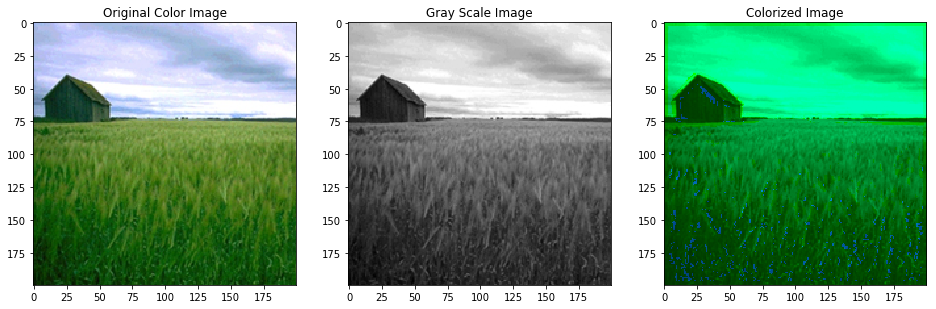

In [26]:
res=np.zeros((im.shape[0],im.shape[1],3),dtype=uint8)
res[:,:,0]=(im).astype(np.uint8)
res[:,:,1]=(a).astype(np.uint8)
res[:,:,2]=(b).astype(np.uint8)
colorized=cv2.cvtColor(res,cv2.COLOR_Lab2RGB)
im_original=cv2.imread('sample/test/fie6.jpg')
im_original=cv2.resize(im_original,(200,200))
im_original=cv2.cvtColor(im_original,cv2.COLOR_BGR2RGB)
plt.subplot(1,3,1)
plt.imshow(im_original,cmap='gray')
plt.title('Original Color Image')
plt.subplot(1,3,2)
plt.imshow(im,cmap='gray')
plt.title('Gray Scale Image')
plt.subplot(1,3,3)
plt.imshow(colorized)
plt.title('Colorized Image')
plt.savefig('naive_fnet.png')
plt.show()

In [300]:
set(list(np.argmax(Y,axis=1)))
set(list(a.flatten()))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}